In [1]:
# import necessary packages
import cv2
import os
import json
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt

In [2]:
# load image path and image
image_path = '/content/fruits.jpg'
image = cv2.imread(image_path)

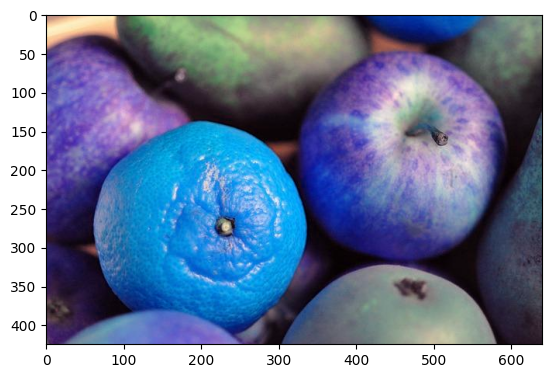

In [3]:
plt.imshow(image)

In [4]:
# Convert to rbg from bgr
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

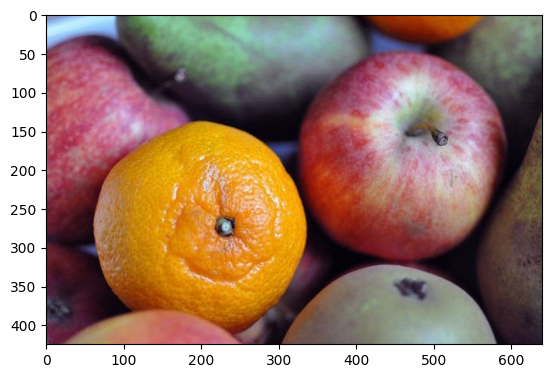

In [5]:
# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis()
plt.show()

In [6]:
# resize the image to 500x500 pixels
resized_image = cv2.resize(image_rgb, (500, 500))

In [7]:
# save the preprocessed image
cv2.imwrite('resized_image.jpg', resized_image)

True

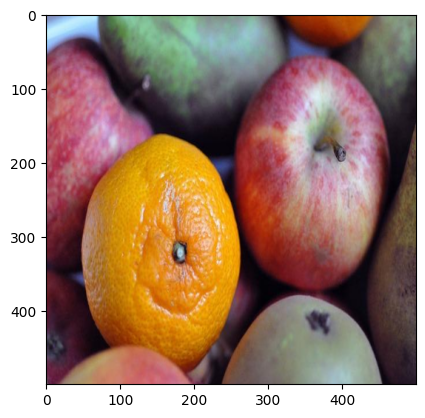

In [8]:
# Display the resized image using matplotlib
plt.imshow(resized_image)
plt.axis()
plt.show()

In [9]:
# Rotate the image (90 degrees clockwise)
rotated_image_90 = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

In [10]:
# Save the rotated image
cv2.imwrite('rotated_image_90.jpg', rotated_image_90)

True

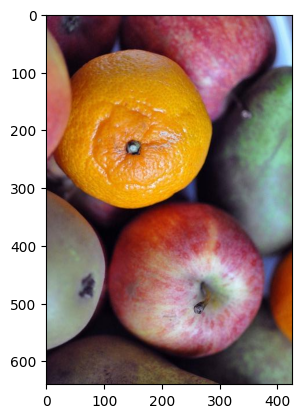

In [11]:
# Display the rotated image
plt.imshow(rotated_image_90)
plt.axis()
plt.show()

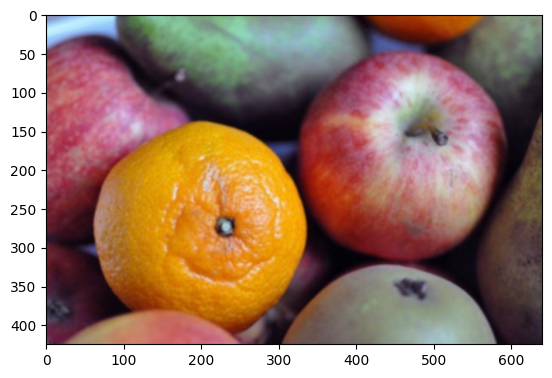

In [12]:
# Denoise the image using Gaussian blur
denoised_image = cv2.GaussianBlur(image_rgb, (5,5), 0)

# Save the denoised image
cv2.imwrite('denoised_image.jpg', denoised_image)

# Display the denoised image
plt.imshow(denoised_image)
plt.axis()
plt.show()

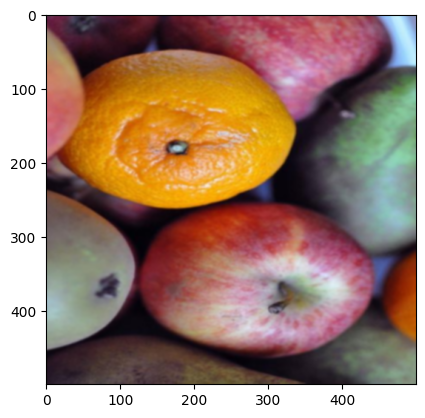

In [13]:
# apply resizing, rotation and denoising to the image and save it as processed image
image = cv2.imread('/content/fruits.jpg')

# Convert the image from BGR to RGB format (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# resize the same image to 500x500 pixel
image_rgb = cv2.resize(image_rgb, (500, 500))

# Rotate the image (90 degrees clockwise)
image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

# Denoise the image using Gaussian blur
image_rgb = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Save the processed image
cv2.imwrite('processed_image.jpg', image_rgb)

# Display the processed image
plt.imshow(image_rgb)
plt.axis()
plt.show()

In [14]:
# metadata for the processed fruit image
metadata = {
    "processed_image.jpg": {
        "keywords": ["Fruits", "Healthy food", "green"],
        "description": "A processed fruit image with resizing, rotation, and denoising applied."
    }
}

In [15]:
# Save metadata to JSON file
with open('image_metadata.json','w') as json_file:
  json.dump(metadata, json_file, indent=4)

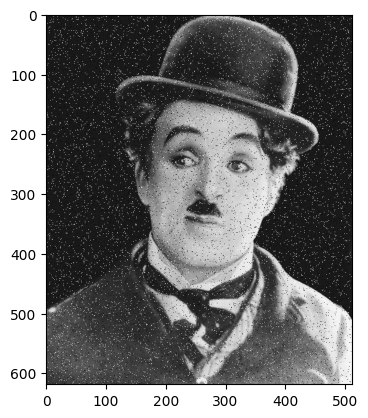

In [16]:
image2 = cv2.imread('/content/Chaplin.png')
plt.imshow(image2)

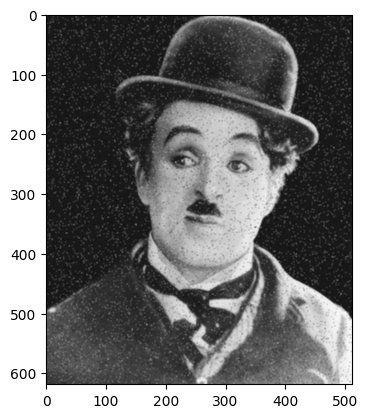

In [17]:
# Denoise the image using Gaussian blur
denoised_image2 = cv2.GaussianBlur(image2, (3,3), 5)

# Save the denoised image
cv2.imwrite('denoised_image.jpg', denoised_image2)

# Display the denoised image
plt.imshow(denoised_image2)
plt.axis()
plt.show()

In [18]:
# Calculate the mean and norm ofpixel intensities
mean_intensity = np.mean(image_rgb)
norm_intensity = np.linalg.norm(image_rgb)

# Print the results
print("Mean Intensity:", mean_intensity)
print("Norm of Pixel Intensities:", norm_intensity)

Mean Intensity: 105.47660533333334
Norm of Pixel Intensities: 107253.3861470117


In [19]:
processed_image = image_rgb

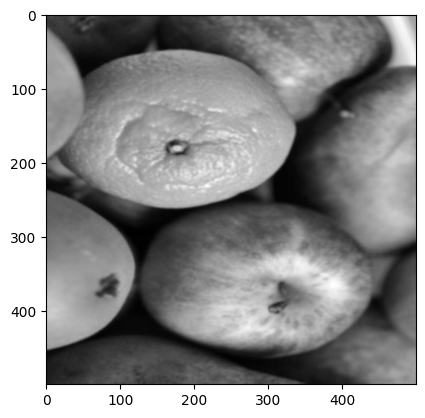

In [20]:
# Extract Shape Features
# Convert to a grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

In [21]:
# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

In [22]:
# Find contours from the edge-detected image
contours,_=cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [23]:
#Iterate through each contour to calculate the shape features
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)
    # Calculate Perimeter
    perimeter = cv2.arcLength(contour, True) # True means contour is closed
    # Centroid (center of mass)
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
    else:
        cx, cy = 0, 0
    # Bounding box (smallest rectangle that contains the object)
    x,y,w,h = cv2.boundingRect(contour)

    # Print thr shape features
    print(f"Area: {area}, Perimeter: {perimeter}, Centroid: ({cx}, {cy}), Bounding Box: ({x}, {y}), Width: {w}, Height: {h}")

Area: 11.5, Perimeter: 66.18376517295837, Centroid: (321, 396), Bounding Box: (309, 391), Width: 20, Height: 11
Area: 17.0, Perimeter: 113.74011433124542, Centroid: (307, 399), Bounding Box: (300, 387), Width: 22, Height: 19
Area: 11.5, Perimeter: 144.6101714372635, Centroid: (75, 375), Bounding Box: (67, 367), Width: 31, Height: 16
Area: 5.0, Perimeter: 66.28427064418793, Centroid: (319, 363), Bounding Box: (313, 361), Width: 18, Height: 16
Area: 8.0, Perimeter: 35.79898929595947, Centroid: (95, 360), Bounding Box: (92, 355), Width: 7, Height: 12
Area: 109.0, Perimeter: 738.2640615701675, Centroid: (84, 341), Bounding Box: (0, 237), Width: 121, Height: 218
Area: 4.0, Perimeter: 33.79898929595947, Centroid: (145, 198), Bounding Box: (140, 194), Width: 14, Height: 9
Area: 21.0, Perimeter: 73.39696848392487, Centroid: (25, 205), Bounding Box: (14, 192), Width: 26, Height: 25
Area: 1.0, Perimeter: 44.485281229019165, Centroid: (191, 189), Bounding Box: (171, 189), Width: 22, Height: 2
Are

In [24]:
# collect all the shape features as a dictionary
shape_features = {
    "Area": area,
    "Perimeter": perimeter,
    "Centroid": (cx, cy),
    "Bounding Box": (x, y, w, h)
}

In [25]:
# Collect all the features extracted from the processed_image and store as a metadat file
feature_extracted = {
    "mean_intensity": mean_intensity,
    "norm_intensity": norm_intensity,
    "shape_features": shape_features
}

In [26]:
# save the feature to an JSON file
with open('image_features.json', 'w') as json_file:
  json.dump(feature_extracted, json_file, indent=4)

TEXT PROCESSING


In [27]:
# import necessary library
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

In [28]:
# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [29]:
# Load the content of the specified file
with open('/content/101551') as file:
  document_101551 = file.read()

In [30]:
len(document_101551)

2957

In [31]:
document_sample = document_101551[622:-15]

In [32]:
# Text normalization - convert doc 101551 to lowercase and rename as document_sample_lower
document_sample_lower = document_sample.lower()

In [33]:
# Tokenization: Split doc 101551 sample lower into words
tokens = word_tokenize(document_sample_lower)

In [34]:
tokens

['|',
 '>',
 ':',
 'i',
 'have',
 'been',
 'active',
 'in',
 'defending',
 'saturn',
 'lately',
 'on',
 'the',
 'net',
 'and',
 'would',
 '|',
 '>',
 ':',
 'like',
 'to',
 'state',
 'my',
 'full',
 'opinion',
 'on',
 'the',
 'subject',
 ',',
 'rather',
 'than',
 'just',
 'reply',
 'to',
 'others',
 "'",
 '|',
 '>',
 ':',
 'points',
 '.',
 '|',
 '>',
 ':',
 '|',
 '>',
 ':',
 'the',
 'biggest',
 'problem',
 'some',
 'people',
 'seem',
 'to',
 'be',
 'having',
 'is',
 'that',
 'saturn',
 '|',
 '>',
 ':',
 'dealers',
 'make',
 '~',
 '$',
 '2k',
 'on',
 'a',
 'car',
 '.',
 'i',
 'think',
 'most',
 'will',
 'agree',
 'with',
 'me',
 'that',
 'the',
 'car',
 'is',
 '|',
 '>',
 ':',
 'comparably',
 'priced',
 'with',
 'its',
 'competitors',
 ',',
 'that',
 'is',
 ',',
 'they',
 'are',
 "n't",
 'overpriced',
 '|',
 '>',
 ':',
 'compared',
 'to',
 'most',
 'cars',
 'in',
 'their',
 'class',
 '.',
 'i',
 'do',
 "n't",
 'understand',
 'the',
 'point',
 'of',
 '|',
 '>',
 ':',
 'arguing',
 'over',


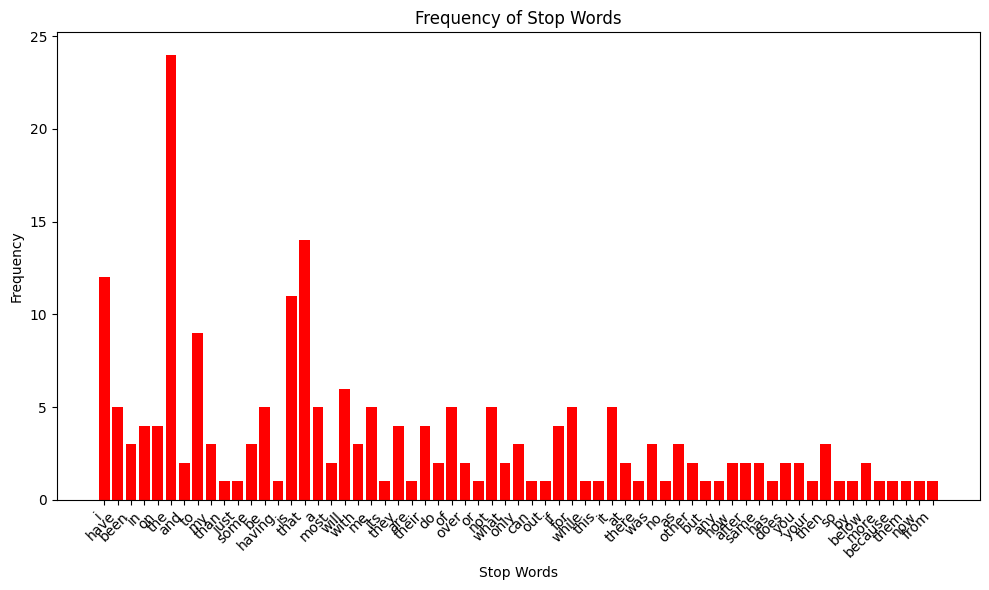

In [35]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

# Get the list of English stop words
stop_words = stopwords.words('english')

# Create a frequency distribution of stop words in your 'tokens' list
stop_word_counts = Counter(word for word in tokens if word in stop_words)

# Extract stop words and their frequencies for plotting
words = list(stop_word_counts.keys())
frequencies = list(stop_word_counts.values())

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(words, frequencies, color='red')  # Set bar color to red
plt.xlabel("Stop Words")
plt.ylabel("Frequency")
plt.title("Frequency of Stop Words")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Increase spacing between x-axis labels
plt.subplots_adjust(bottom=0.6)  # Adjust bottom margin to provide more space

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [36]:
# removal of punctuations
tokens = [word for word in tokens if word not in string.punctuation]

In [37]:
# removal of stop words
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

In [38]:
# print the preprocessed tokens
print("Preprocessed Tokens:", tokens)

Preprocessed Tokens: ['active', 'defending', 'saturn', 'lately', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'reply', 'others', 'points', 'biggest', 'problem', 'people', 'seem', 'saturn', 'dealers', 'make', '2k', 'car', 'think', 'agree', 'car', 'comparably', 'priced', 'competitors', "n't", 'overpriced', 'compared', 'cars', 'class', "n't", 'understand', 'point', 'arguing', 'whether', 'dealer', 'makes', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profits', 'either', 'thing', 'figure', 'people', 'believe', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', 'expenses', 'car', 'may', 'true', 'cases', 'believe', 'generally', 'true', 'bought', 'saturn', 'sl', 'january', "'92", 'time', 'based', 'studying', 'car', 'prices', 'decided', 'comparable', 'car', 'priced', 'cheaply', 'saturn', 'sure', 'maybe', 'could', 'talked', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expenses', 'would', "n't", 'different', "'s", 'important', 'much

In [39]:
# Initialize stemmer and lemmatizer
Stemmer = PorterStemmer()
Lemmatizer = WordNetLemmatizer()

In [40]:
# Apply stemming to the tokens
stemmed_words = [Stemmer.stem(word) for word in tokens]

In [41]:
# Print the stems from the tokens
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['activ', 'defend', 'saturn', 'late', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'repli', 'other', 'point', 'biggest', 'problem', 'peopl', 'seem', 'saturn', 'dealer', 'make', '2k', 'car', 'think', 'agre', 'car', 'compar', 'price', 'competitor', "n't", 'overpr', 'compar', 'car', 'class', "n't", 'understand', 'point', 'argu', 'whether', 'dealer', 'make', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', 'thing', 'figur', 'peopl', 'believ', 'minim', 'dealer', 'profit', 'minim', 'total', 'out-of-pocket', 'expens', 'car', 'may', 'true', 'case', 'believ', 'gener', 'true', 'bought', 'saturn', 'sl', 'januari', "'92", 'time', 'base', 'studi', 'car', 'price', 'decid', 'compar', 'car', 'price', 'cheapli', 'saturn', 'sure', 'mayb', 'could', 'talk', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expens', 'would', "n't", 'differ', "'s", 'import', 'much', 'money', 'left', 'buy', 'car', 'reduc', 'dealer', 'profit', 'thing', 'sa

In [42]:
# metadata about the vectorization process
metadata = {
    "vectorization_method": {
        "bag_of_words": "Each word in the corpus is treated as a feature, and the text is represented by a count of each word.",
        "tf_idf": "Each word in the corpus is weighted based on its frequency in the document and its inverse frequency across all documents."
        },
    "document_summary": "This is a summary of the text data preprocessing and vectorization for document 101551.",
    "sentiment_label": "neutral" # ypu can update this label based on your analysis
    }

In [43]:
# save metadata to a JSON file
with open('text_metadata.json', 'w') as json_file:
  json.dump(metadata, json_file, indent=4)